In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
d = files.upload()

Saving merged_sales_data.csv to merged_sales_data.csv


In [132]:
df = pd.read_csv('merged_sales_data.csv')

In [133]:
df.shape

(186850, 6)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [135]:
df.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [136]:
df = df.dropna()

In [137]:
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [138]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")

In [139]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

<ipython-input-139-b7526dc4d4da>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")


In [140]:
df = df.dropna(subset=["Order Date"])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [142]:
df["Month"] = df["Order Date"].dt.to_period("M")

In [143]:
df = df.drop(columns=["Order ID", "Product","Purchase Address"])

In [144]:
df["Total Price"] = df["Quantity Ordered"] * df["Price Each"]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Quantity Ordered  185950 non-null  float64       
 1   Price Each        185950 non-null  float64       
 2   Order Date        185950 non-null  datetime64[ns]
 3   Month             185950 non-null  period[M]     
 4   Total Price       185950 non-null  float64       
dtypes: datetime64[ns](1), float64(3), period[M](1)
memory usage: 8.5 MB


In [147]:
monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Total Price"].sum()

In [148]:
monthly_sales.index = monthly_sales.index.to_timestamp()

In [149]:
decomposition = seasonal_decompose(monthly_sales, model="additive", period=6)

In [150]:
trend = decomposition.trend

In [151]:
trend

,trend
Order Date,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,2.726814e+06
2019-05-01,2.799867e+06
2019-06-01,2.744276e+06
2019-07-01,2.713985e+06
2019-08-01,2.746740e+06
2019-09-01,2.920293e+06


In [152]:
season = decomposition.seasonal

In [153]:
season

,seasonal
Order Date,
2019-01-01,7066.795625
2019-02-01,-428995.508542
2019-03-01,-749456.386042
2019-04-01,838565.851875
2019-05-01,426016.252292
2019-06-01,-93197.005208
2019-07-01,7066.795625
2019-08-01,-428995.508542
2019-09-01,-749456.386042


In [154]:
residual = decomposition.resid

In [155]:
residual

,resid
Order Date,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,-174709.470208
2019-05-01,-73276.258958
2019-06-01,-73276.258958
2019-07-01,-73276.258958
2019-08-01,-73276.258958
2019-09-01,-73276.258958


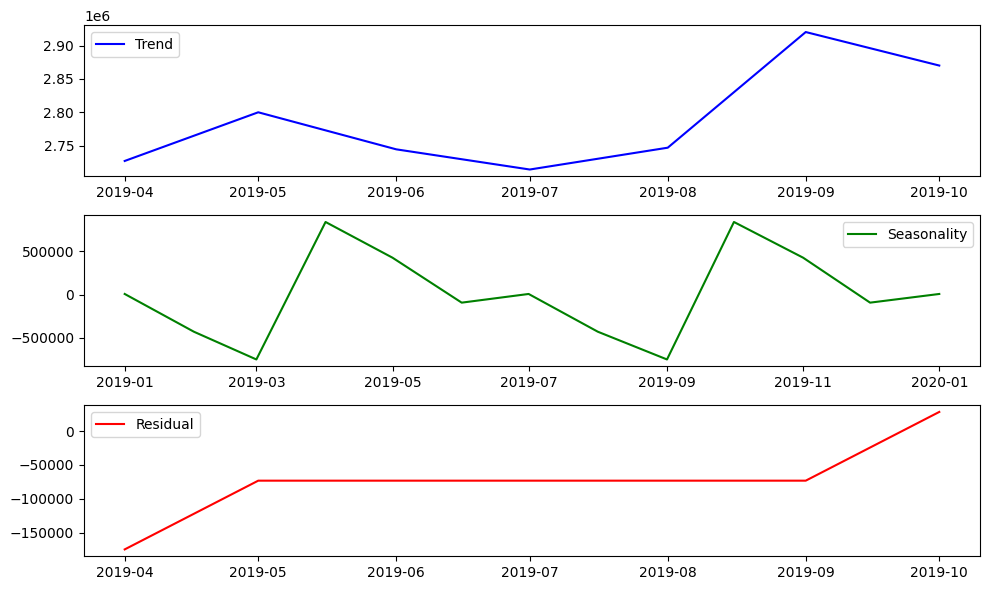

In [157]:
# Plot the decomposition
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(trend, label="Trend", color="blue")
plt.legend(loc="best")

plt.subplot(3, 1, 2)
plt.plot(season, label="Seasonality", color="green")
plt.legend(loc="best")

plt.subplot(3, 1, 3)
plt.plot(residual, label="Residual", color="red")
plt.legend(loc="best")

plt.tight_layout()
plt.show()